# Clase 8 - preparativo parcial

El objetivo de esta clase es dar un repaso de lo visto en el curso hasta la fecha, donde se aplicarán múltiples estrategias de clúster y como se puede asociar a la industria. Además de entender la estructura del parcial y metodología de evaluación.





In [ ]:
!pip install scikit-learn-extra
from google.colab import drive # conexión con drive
drive.mount('/content/drive')
import pandas as pd # Manejo de Data Frame
import numpy as np # Manejo matricial
import warnings # Omitir warnings
warnings.filterwarnings("ignore") # Ignorar
# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Librerías para clustering
from sklearn.cluster import (KMeans, DBSCAN, AgglomerativeClustering)
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # estandarizar variables.
from sklearn.ensemble import IsolationForest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.5 MB/s eta 0:00:00
Mounted at /content/drive


# Caso de negocio


Con la creciente competencia en el mercado inmobiliario de Nueva York, es fundamental para las empresas del sector identificar oportunidades de mercado y mejorar sus estrategias comerciales.

En el mercado inmobiliario de Nueva York, la diversidad de propiedades disponibles presenta un desafío para los agentes inmobiliarios al momento de especializarse y maximizar sus ventas. La venta de una casa costosa con pocas habitaciones difiere significativamente de una casa económica con múltiples habitaciones, lo que resalta la importancia de la especialización. A través de la creación de segmentos de casas basados en características clave como precio, tamaño, número de habitaciones y ubicación, se busca asignar a los agentes inmobiliarios a segmentos específicos que se alineen con sus habilidades y conocimientos, optimizando así sus esfuerzos de venta y potenciando su éxito en un mercado tan diverso y competitivo como el de Nueva York.

Para esto se tienen información demográfica, comportamiento de gastos, niveles de satisfacción e información de campañas.

Description of Columns:

* BROKERTITLE: Title of the broker.

* TYPE: Type of the house.

* PRICE: Price of the house.

* BEDS: Number of bedrooms.

* BATH: Number of bathrooms.

* PROPERTYSQFT: Square footage of the property.

* ADDRESS: Full address of the house.

* STATE: State of the house.

* MAIN_ADDRESS: Main address information.

* ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information.

* LOCALITY: Locality information.

* SUBLOCALITY: Sublocality information.

* STREET_NAME: Street name.

* LONG_NAME: Long name.

* FORMATTED_ADDRESS: Formatted address.

* LATITUDE: Latitude coordinate of the house.

* LONGITUDE: Longitude coordinate of the house.

# Metodología

Para este tipo de problema debemos entender el problema y las expectativas del negocio.






## Problema del negocio

Crear segmentos de casa para asignar agentes inmobiliarios.



## Entender los datos

Para resolver este problema debemos analizar los datos y verificar que estos están alineados con el problema del negocio.



In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/Aprendizaje no supervisado/Base de datos/NY-House-Dataset.csv")
datos

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Tenemos información mucha información que representa la ubicación de la casa, sin embargo, ¿de dicha información cuál es la más relevante?

Muchas de ellos son componentes de la dirección, pero esta es casi única para todas las casas, lo que nos puede servir es la posición geográfica.




In [ ]:

fig = px.scatter_mapbox(datos, lat="LATITUDE", lon="LONGITUDE", #hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["blue"], zoom=9, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Es importante conocer la ubicación de los agentes inmobiliarios, ya que estos deben estar ubicados en puntos estratégicos, por esto dichas variables van a ser utilizadas para segmentación.

¿Qué otras variables podemos analizar?

El precio, habitaciones, baños, cantidad de metros cuadrados y el tipo de vivienda.



In [ ]:
datos.describe() # Resumen variables númericas

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


##  Detección de atípicos

Haciendo un resumen estadístico, observamos que hay casas con un precio elevado, un orden de $10^9$ ¿será algo normal?

Uno asume que a mayor sea la cantidad de metros cuadrados, mayor es el valor de la casa. ¿Qué sucede?


<Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>

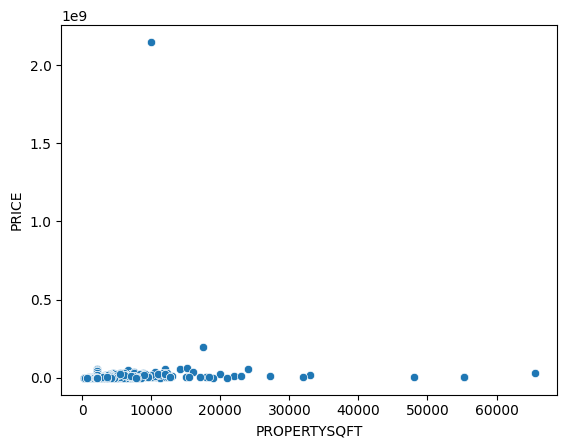

In [ ]:
sns.scatterplot(datos, x="PROPERTYSQFT", y="PRICE" )

<Axes: xlabel='BEDS', ylabel='PRICE'>

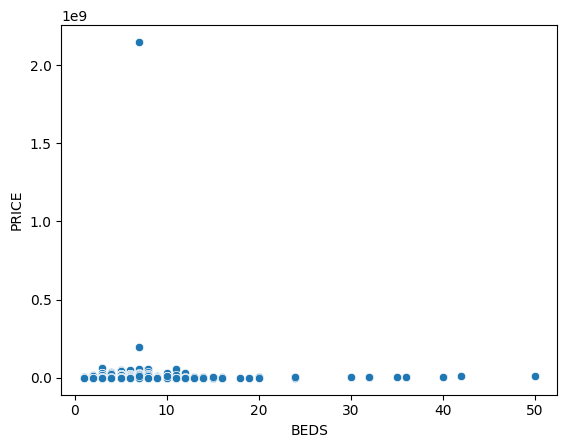

In [ ]:
sns.scatterplot(datos, x="BEDS", y="PRICE" )

<Axes: xlabel='BEDS', ylabel='BATH'>

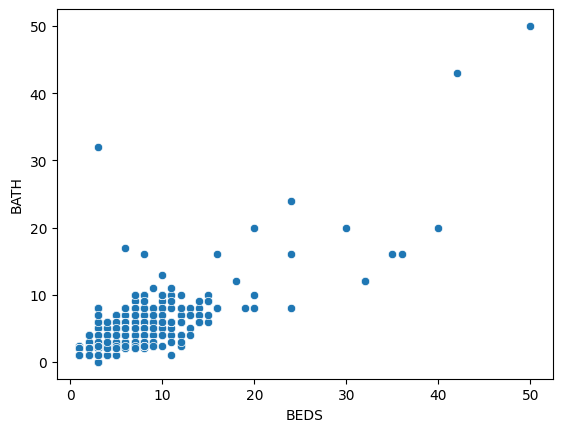

In [ ]:
sns.scatterplot(datos, x="BEDS", y="BATH" )

<Axes: xlabel='PROPERTYSQFT', ylabel='BATH'>

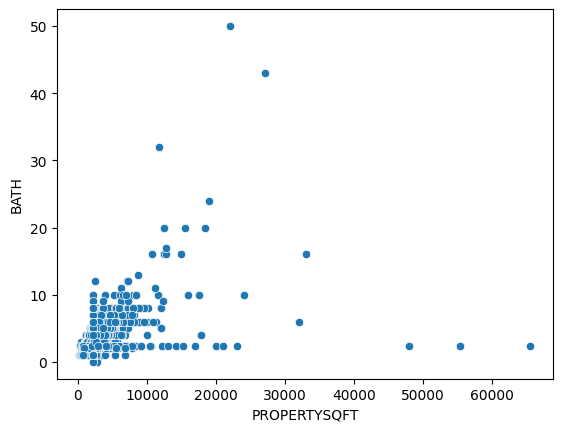

In [ ]:
sns.scatterplot(datos, x="PROPERTYSQFT", y="BATH" )